## Submitted MBHB results regarding the sky location

In [18]:
################ *** General for the plots *** ################
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

# plt.style.use(['seaborn-ticks','seaborn-deep'])
plt.style.use(['seaborn-v0_8-ticks','seaborn-v0_8-deep'])

rcparams = {
          'axes.labelsize': 8,
          'font.size': 10,
          'legend.fontsize': 8,
          'xtick.color': 'k',
          'xtick.labelsize': 8,
          'ytick.color': 'k',
          'ytick.labelsize': 8,
          'text.usetex': False,
          'font.family': 'Times New Roman',
          'font.sans-serif': 'Bitstream Vera Sans',
          'mathtext.fontset': 'stixsans',
          'text.color': 'k',
          'figure.figsize': [12, 7],
          'figure.dpi': 900,
          'axes.grid' : True
          }

rcparams['axes.linewidth'] = 0.5

mpl.rcParams.update(rcparams)
############################################################

In [3]:
############# *** lisacattools & sky-maps *** #############
from astropy.coordinates import SkyCoord 
from astropy import units

##########################################################
import numpy as np
import os
import sys

import ldc.io.hdf5 as h5io # reading h5 file
import pandas as pd       # pandas for data-tables

%load_ext autoreload
%autoreload 2

################## *** LISA constants *** ##################
import lisaconstants as constants
light = constants.C
YRSID_SI = constants.SIDEREALYEAR_J2000DAY*24*60*60
PARSEC_METER = constants.PARSEC_METER
MTsun = constants.GM_SUN/constants.SPEED_OF_LIGHT**3
AU = constants.ASTRONOMICAL_UNIT/light
Gpct = 1.e9*constants.PARSEC_METER/constants.SPEED_OF_LIGHT
############################################################

### Reading Sangria MBHB params

These are our injected sources.

In [4]:
sangria_fl = '/Users/asasli/Projects/LISA/Sangria/LDC2_sangria_training_v2.h5'
mbhb_sangria, mbhb_units = h5io.load_array(sangria_fl, name="sky/mbhb/cat")
MBHB_data = pd.DataFrame(mbhb_sangria)

In [5]:
mbhb_units

{'CoalescenceTime': 's',
 'Distance': 'Mpc',
 'EclipticLatitude': 'rad',
 'EclipticLongitude': 'rad',
 'Inclination': 'rad',
 'InitialAzimuthalAngleL': 'rad',
 'InitialPolarAngleL': 'rad',
 'Mass1': 'Msun',
 'Mass2': 'Msun',
 'PhaseAtCoalescence': 'rad',
 'PolarAngleOfSpin1': 'rad',
 'PolarAngleOfSpin2': 'rad',
 'Polarization': 'rad',
 'Redshift': '1',
 'Spin1': '1',
 'Spin2': '1'}

In [6]:
MBHB_data

EclipticLatitude  EclipticLongitude  PolarAngleOfSpin1  PolarAngleOfSpin2  \
0          -0.564102           0.610927           0.908972           1.181699   
1          -1.081082           4.052963           2.354232           1.689765   
2           0.636028           0.779159           2.332027           2.065443   
3          -0.878570           4.549720           2.068669           1.097989   
4          -0.303004           1.292518           1.203136           2.097304   
5           0.147296           5.986230           2.434152           1.926613   
6          -0.987304           3.886726           2.594339           1.719446   
7           0.917031           3.584892           1.665850           2.092903   
8           0.835250           3.257316           2.362671           1.539846   
9          -0.521369           3.085541           2.582941           2.200156   
10          1.288883           2.107165           0.624784           1.607191   
11          0.094840           5.181677           2.219383           1.229133   
12         -0.044132           3.778338           2.319430           2.366346   
13         -0.317047           1.304027           2.302154           1.316011   
14          0.103452           0.224388           2.143049           1.656132   

       Spin1     Spin2         Mass1         Mass2  CoalescenceTime  \
0   0.972661  0.972862  1.015522e+06  7.968491e+05     4.800021e+06   
1   0.742128  0.989247  4.956676e+06  4.067167e+06     8.746488e+06   
2   0.574122  0.592671  1.773563e+06  1.083356e+06     1.116784e+07   
3   0.942824  0.870789  9.159926e+05  7.017527e+05     1.125857e+07   
4   0.747377  0.838800  1.323277e+06  6.124855e+05     1.152694e+07   
5   0.745574  0.546848  2.830218e+06  2.322253e+06     1.197096e+07   
6   0.829141  0.972219  3.204750e+06  3.056613e+06     1.361711e+07   
7   0.988778  0.975945  1.856420e+06  1.801541e+06     1.653219e+07   
8   0.833674  0.981901  3.983915e+06  2.049535e+06     1.724516e+07   
9   0.825883  0.811360  3.128823e+06  2.640346e+06     1.860576e+07   
10  0.953675  0.954511  1.349254e+06  1.195716e+06     2.042622e+07   
11  0.908497  0.691493  1.676194e+06  6.075692e+05     2.222807e+07   
12  0.686801  0.898360  3.578042e+06  1.485700e+06     2.343984e+07   
13  0.927874  0.963228  1.238127e+06  1.136674e+06     2.440876e+07   
14  0.875693  0.882968  6.389298e+06  3.161571e+06     2.951609e+07   

    PhaseAtCoalescence  InitialPolarAngleL  InitialAzimuthalAngleL  Redshift  \
0             4.275929            2.577539                4.094550   2.18186   
1             3.783309            0.963586                3.636925   6.17688   
2             2.311127            0.232802                3.798411   6.03496   
3             1.150360            1.899782                5.829771   1.10396   
4             1.220197            2.691982                1.808398   1.73941   
5             4.111379            1.131250                4.319761   5.50770   
6             3.628682            2.050928                1.084370   2.87966   
7             1.866057            1.410068                0.527915   4.57261   
8             1.578620            2.323179                3.643228   3.34910   
9             3.425317            2.604701                1.670016   7.21026   
10            3.435176            2.064630                4.287875   3.58897   
11            0.249198            1.867270                4.798109   4.30693   
12            5.287569            1.359213                0.080727   7.18802   
13            5.213840            1.892711                2.667205   4.44948   
14            3.654661            1.576879                1.208145   8.08487   

        Distance  ObservationDuration  Cadence  
0   17758.367941         3.155815e+07      3.0  
1   61097.116076         3.155815e+07      3.0  
2   59472.237592         3.155815e+07      3.0  
3    7705.852640         3.155815e+07      3.0  
4   13470.983559         3.155815e+07      3

#### Needed Data

In [7]:
# ecliptic coordinate system
# Ecliptic longitude (\lambda); measured along the ecliptic from the vernal equinox
# Ecliptic latitude (\beta); measured perpendicular to the ecliptic
def sky_SourceDic(x, name='MBHB'):
    y = {}
    y['lambda'] = (x["EclipticLongitude"])% (2 * np.pi)  # should be in (0,2*pi)
    y['beta']   = x['EclipticLatitude']
    y['D']      = x['Distance']
    
    return y

In [8]:
sources = sky_SourceDic(mbhb_sangria, name='MBHB')

In [9]:
# labels and true values
lbls = [r'$\lambda$', r'$\beta$', r'$D$']
true_vals = np.array([sources['lambda'], sources['beta'], sources['D']]).T

### 1) Submission - L2IT

In [10]:
import glob
L2IT_dir = '/Users/asasli/Projects/LISA/Sangria/submissions/L2IT-APC/Noise_MBHBs/'
L2IT_fls = glob.glob(L2IT_dir+'*csv')
L2IT_dat = []
for ii in range(len(L2IT_fls)):
    fl = L2IT_dir + 'mbhb-'+str(ii)+'-pdf.csv'
    if fl not in L2IT_fls:
        print (fl, 'no found')
    else:
        dat = np.genfromtxt(fl, delimiter=",", names=True)
        L2IT_dat.append(dat)
print (len(L2IT_dat))  ### should be sorted

/Users/asasli/Projects/LISA/Sangria/submissions/L2IT-APC/Noise_MBHBs/mbhb-15-pdf.csv no found
/Users/asasli/Projects/LISA/Sangria/submissions/L2IT-APC/Noise_MBHBs/mbhb-16-pdf.csv no found
15


In [11]:
print (L2IT_dat[0].dtype)

[('Mass1', '<f8'), ('Mass2', '<f8'), ('Spin1', '<f8'), ('Spin2', '<f8'), ('Tc', '<f8'), ('DL', '<f8'), ('Incl', '<f8'), ('EclLat', '<f8'), ('EclLong', '<f8'), ('Pol', '<f8'), ('PhC', '<f8')]


In [12]:
def L2IT_sky(LA):
    sub_LA = np.zeros( (len(LA), len(lbls)) )
    
    sub_LA[:,0]  = (LA["EclLong"])% (2 * np.pi)
    sub_LA[:,1]  = LA['EclLat']
    sub_LA[:,2]  = LA['DL']
    
    return sub_LA

Load modules for sky maps:

In [13]:
# Show current directory
current_directory = os.getcwd()
print("Current Directory:", current_directory)

# Add src directory
src_directory = os.path.abspath(os.path.join(current_directory, os.pardir, "src"))
sys.path.append(src_directory)
print("Added src Directory:", src_directory)

from sky_utils import *

Current Directory: /Users/asasli/Projects/LISA/Sangria/test
Added src Directory: /Users/asasli/Projects/LISA/Sangria/src


In [14]:
# write fits files and specify the directory
dirname = '/Users/asasli/Projects/LISA/Sangria/Results/L2IT'
# uncomment loop if you want to write the fits files for every ID
# and make the sky maps
#for ID in range(0, 15):
    # load samples
    #samples = np.array(L2IT_sky(L2IT_dat[ID]))
    #distances = samples[:,2]  
    ## convert to icrs
    #c = SkyCoord(samples[:,0]*units.rad, samples[:,1]*units.rad, frame="barycentrictrueecliptic")
    #c_icrs = c.transform_to('icrs')
    #pts = np.column_stack((c_icrs.ra.rad, c_icrs.dec.rad, distances))
    ## true values
    #mbh_case = true_vals[ID]
    #dist = mbh_case[-1]
    #c_true = SkyCoord(mbh_case[0]*units.rad, mbh_case[1]*units.rad, frame="barycentrictrueecliptic")
    #c_true_icrs = c_true.transform_to('icrs')
    #ra , dec = c_true_icrs.ra.rad, c_true_icrs.dec.rad
    #write_maps_fits(pts, 
    #            dirname=dirname, 
    #            name=ID, trials=5, jobs=8)
    # now plot the skymaps
    #fits_filename = dirname+'/{}_skymap.fits'.format((str(ID)))
    #plot_skymaps(ra, dec, dist, chains=None, 
    #             dirname=dirname, name=ID, fits_filename=fits_filename,
    #             figwidth = 3.5, dpi=300, 
    #             contour_levels=None, transparent=True)

# Let's write the fits for one case:
# load samples
ID=14
samples = np.array(L2IT_sky(L2IT_dat[ID]))
distances = samples[:,2]  
## convert to icrs
c = SkyCoord(samples[:,0]*units.rad, samples[:,1]*units.rad, frame="barycentrictrueecliptic")
c_icrs = c.transform_to('icrs')
pts = np.column_stack((c_icrs.ra.rad, c_icrs.dec.rad, distances))
## true values
mbh_case = true_vals[ID]
dist = mbh_case[-1]
c_true = SkyCoord(mbh_case[0]*units.rad, mbh_case[1]*units.rad, frame="barycentrictrueecliptic")
c_true_icrs = c_true.transform_to('icrs')
ra , dec = c_true_icrs.ra.rad, c_true_icrs.dec.rad
write_maps_fits(pts, 
            dirname=dirname, 
            name=ID, trials=5, jobs=8)

/Users/asasli/miniconda/envs/LISA_LDC/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading existing skypost
adaptive refinement round 1 of 7 ...
adaptive refinement round 2 of 7 ...
adaptive refinement round 3 of 7 ...
adaptive refinement round 4 of 7 ...
adaptive refinement round 5 of 7 ...
adaptive refinement round 6 of 7 ...
adaptive refinement round 7 of 7 ...
evaluating distance layers ...


100%|██████████| 16896/16896 [01:22<00:00, 204.58it/s]


Starting volumetric image...
> Marginalize onto the given faces...
>> Plotting projection 1
>> Plotting projection 2
>> Plotting projection 3
Plotting distance
Image saved at /Users/asasli/Projects/LISA/Sangria/Results/L2IT/figs/volume_skymap_14.pdf
Plotting 2D map in astro hours mollweide projection


/Users/asasli/miniconda/envs/LISA_LDC/lib/python3.8/site-packages/ligo/skymap/plot/util.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_ticklabels(ticklabels)


Image saved at /Users/asasli/Projects/LISA/Sangria/Results/L2IT/figs/skymap_14.pdf


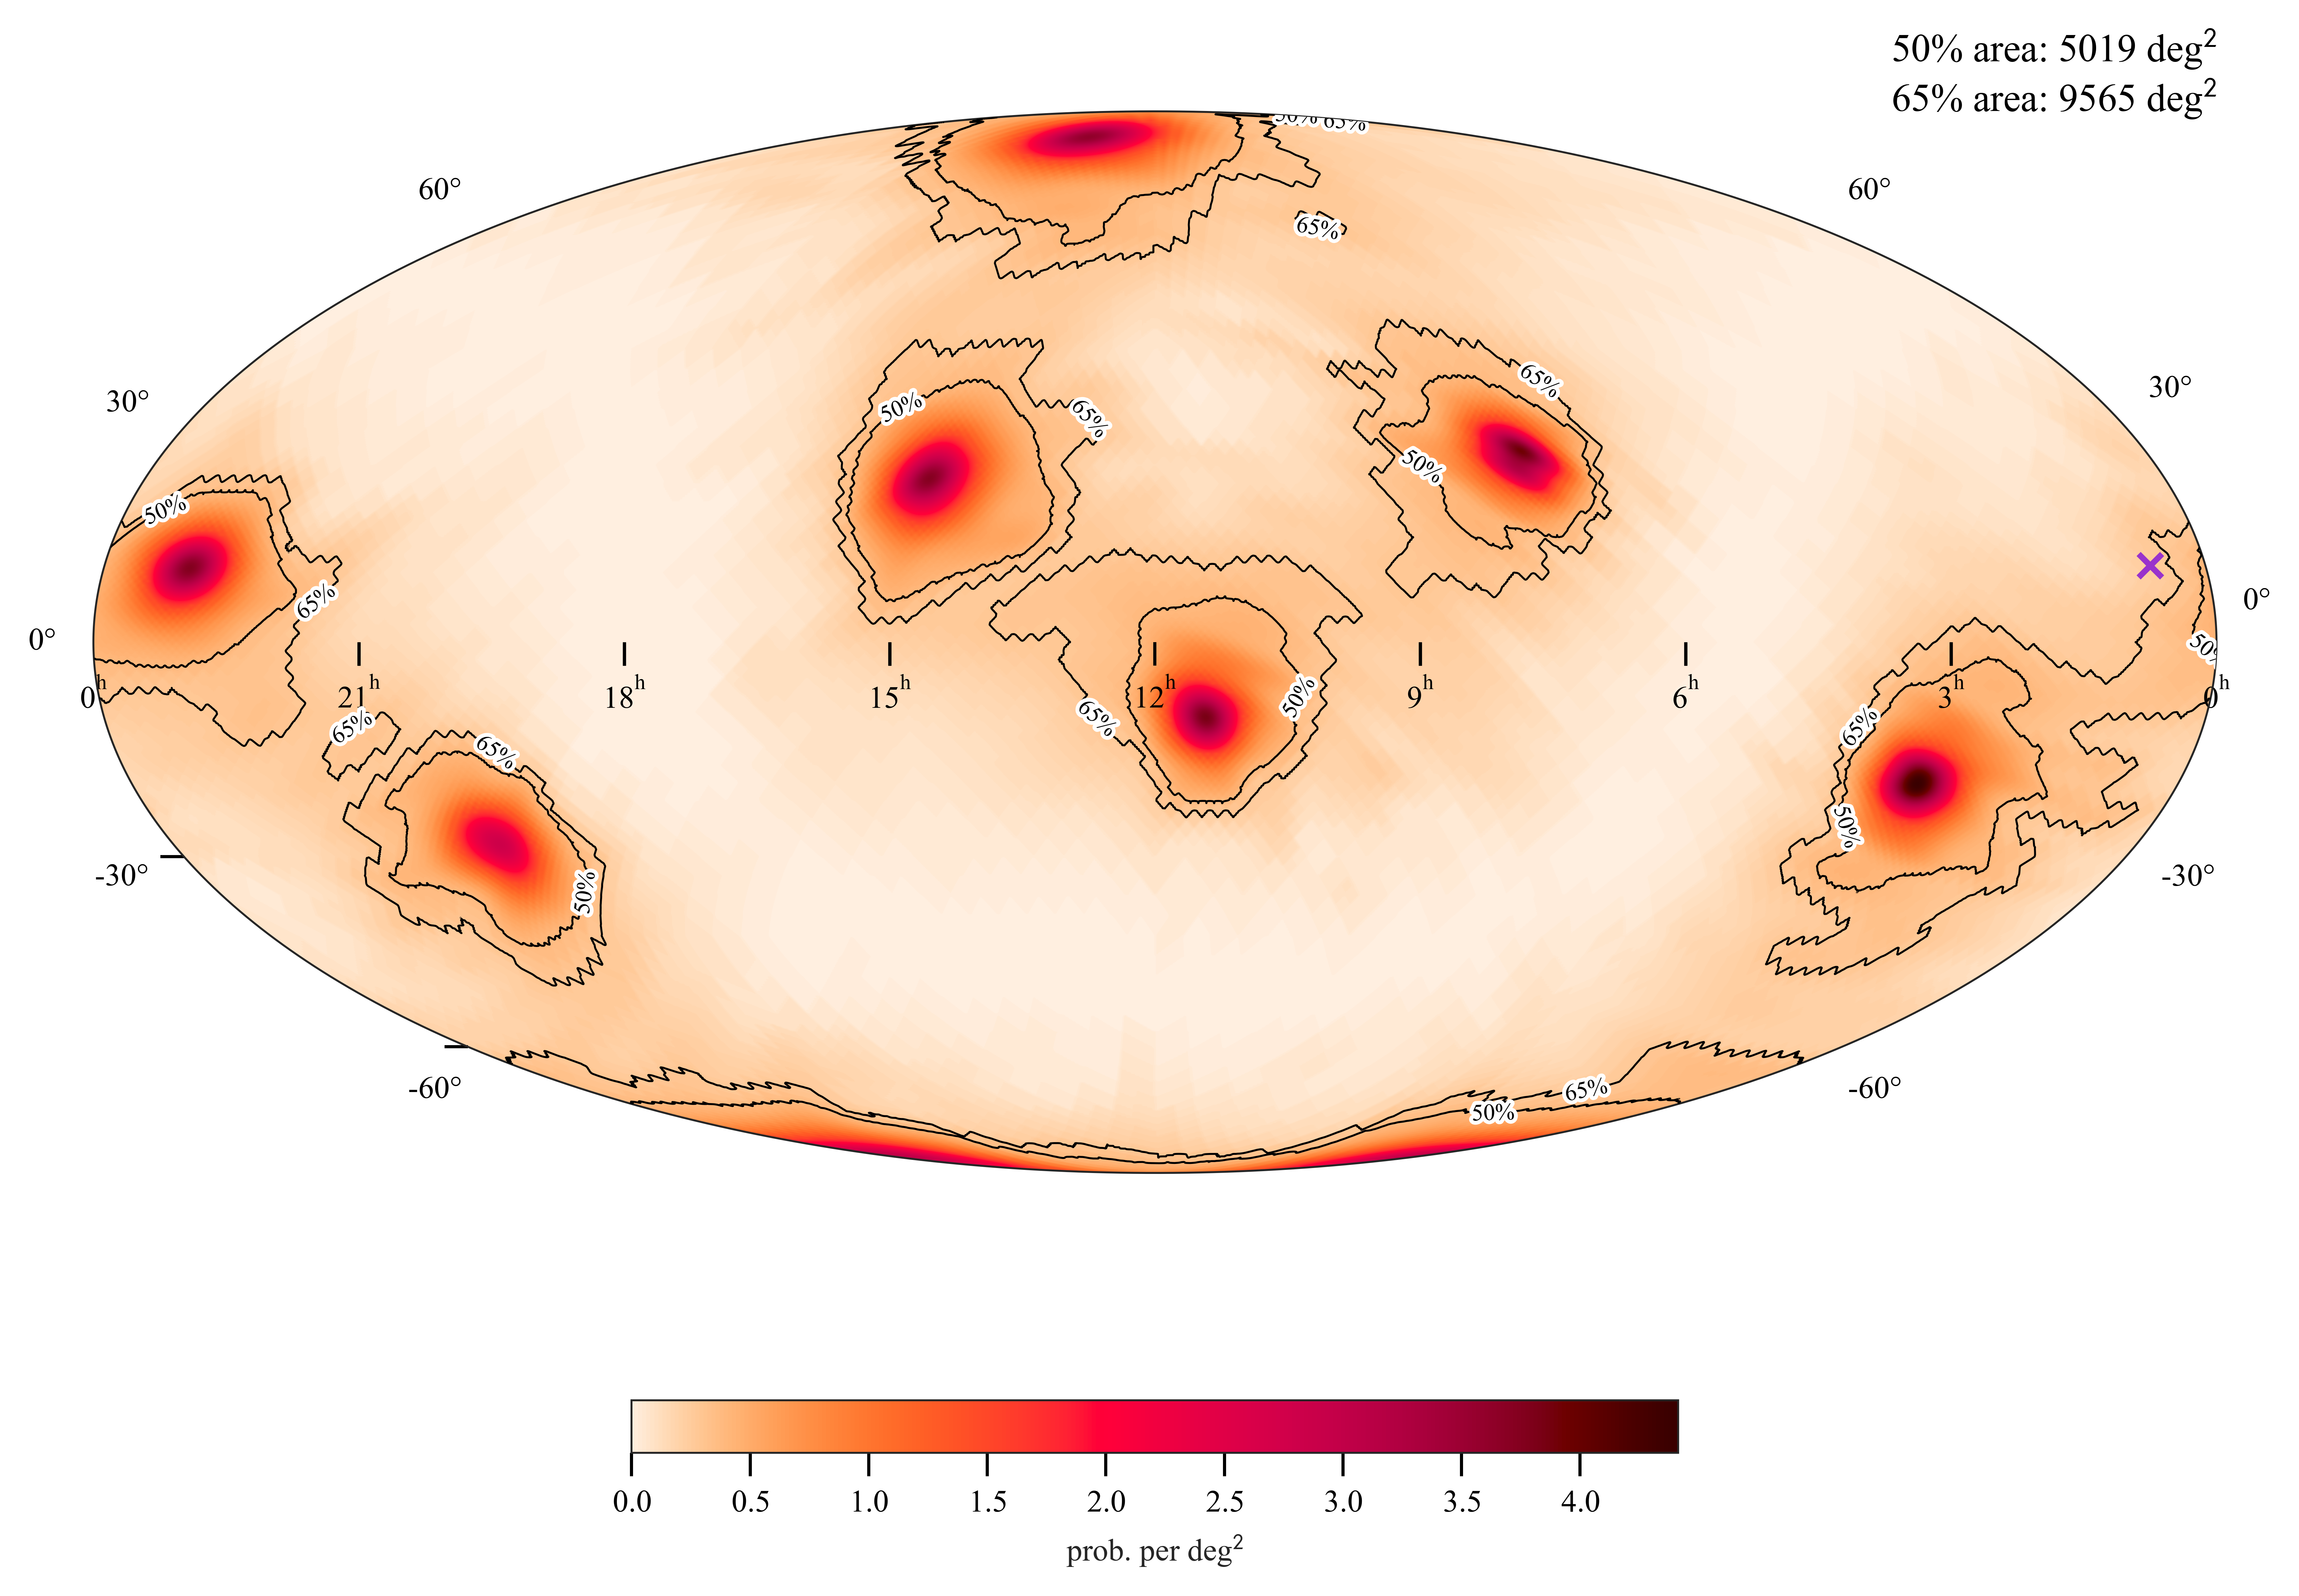

In [19]:
# fits have been saved under the name: dirname+'{}_skymap.fits'.format((str(ID)))
fits_filename = dirname+'/{}_skymap.fits'.format((str(ID)))
plot_skymaps(ra, dec, dist, chains=None, 
                 dirname=dirname, name=ID, fits_filename=fits_filename,
                 figwidth = 3.5, dpi=900, 
                 contour_levels=None, transparent=True)